In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',117)

## What this script does:

   

    - it reads in the coverage & the diversity (pi, theta or D) per sample for single samples and subsampled samples
    - it shows how diversity depends on the coverage

In [21]:
# read in data to panda
# get the number of unclassified reads from Kraken2 outputs

## from trimmed reads
InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromTrimmedReads/Reads_and_Coverage_fromPython.pkl"
##### alternatives: 
#   InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Coverage_fromThomas.txt"
## from mapping
#   InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromMapping/out/Coverage_collect.pkl"

## get the genetic diversity
## ## ## from single samples
#InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_singleData_20240527.pkl"
InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/PiDiv_df_overview_singleData_20240724.pkl"
## ## ## from subsampling
InPi_change1="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/PiDiversity_Overviewsub35_20241024.pkl"
InPi_change2="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/PiDiversity_Overviewsub50_20241024.pkl"
InPi_change3="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/PiDiversity_Overviewsub100_20241024.pkl"

## here, I looked at how pi changes for different pool size and coverage
#InPi_change1="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_maxCov500_Pool100.pkl"
#InPi_change2="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_maxCov500_Pool1000.pkl"
#InPi_change3="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_maxCov800_Pool500.pkl"


In [22]:

## get all the data
df_PiDefault = pd.read_pickle(InPi_default)
df_change1 = pd.read_pickle(InPi_change1)
df_change2 = pd.read_pickle(InPi_change2)
df_change3 = pd.read_pickle(InPi_change3)

#df_cov=pd.read_csv(InCov,delimiter="\t", na_values="na")
df_cov=pd.read_pickle(InCov)

df_cov = df_cov.reset_index()
df_cov.rename(columns={'index': 'ID'}, inplace=True)
df_cov = df_cov[["ID","institution","treatment","replicate","week","coverage"]]

## for the one from mapping
#df_cov.rename(columns={'sample': 'ID', 'mean': 'coverage'}, inplace=True)
#df_cov = df_cov[['ID','coverage']]
print(df_cov[df_cov["coverage"]<35].shape[0])
print(df_cov[df_cov["coverage"]<=50].shape[0])

8
14


In [23]:
df_PiDefault


,ID,institution,treatment,inst_treat,week,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows
div_VU_bn5_15_2,VU_bn5_15_2,VU,bn5,VU_bn5,15,2,0.001644,0.003140,0.001630,0.003092,3.0
div_VU_bb_15_3,VU_bb_15_3,VU,bb,VU_bb,15,3,0.001714,0.003113,0.001700,0.003064,2.0
div_RUG_bb_15_5,RUG_bb_15_5,RUG,bb,RUG_bb,15,5,0.001747,0.003159,0.001736,0.003119,1.0
div_NIOO_bb_15_4,NIOO_bb_15_4,NIOO,bb,NIOO_bb,15,4,0.001727,0.003063,0.001716,0.003024,1.0
div_WUR_bb_15_3,WUR_bb_15_3,WUR,bb,WUR_bb,15,3,0.001683,0.003163,0.001673,0.003128,1.0
div_RUG_bb_1_5,RUG_bb_1_5,RUG,bb,RUG_bb,1,5,0.001703,0.003163,0.001691,0.003122,1.0
div_RUG_bb_1_2,RUG_bb_1_2,RUG,bb,RUG_bb,1,2,0.001718,0.003187,0.001705,0.003144,1.0
div_UVA_anc_0_3,UVA_anc_0_3,UVA,anc,UVA_anc,0,3,0.001751,0.003258,0.001738,0.003215,1.0
div_VU_bb_15_5,VU_bb_15_5,VU,bb,VU_bb,15,5,0.001737,0.003156,0.001722,0.003104,1.0
div_RUG_bb_15_3,RUG_bb_15_3,RUG,bb,RUG_bb,15,3,0.001738,0.003213,0.001724,0.003162,3.0


In [24]:

## merge the data frames
df_merge_all = pd.merge(df_PiDefault, df_cov, on="ID", how="outer")
df_merge_all_butnotall = pd.merge(df_merge_all, df_change1, on="ID", how="inner")
df_merge_change1 = pd.merge(df_change1, df_cov, on="ID", how="outer")
df_merge_change2 = pd.merge(df_change2, df_cov, on="ID", how="outer")
df_merge_change3 = pd.merge(df_change3, df_cov, on="ID", how="outer")

df_merge_change1


,ID,institution_x,treatment_x,inst_treat,week_x,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows_mean,institution_y,treatment_y,replicate,week_y,coverage
0,Gent_bb_15_1,Gent,bb,Gent_bb,15.0,1,0.001662,0.003720,0.001448,0.002728,35.0,Gent,bb,1,15,111.064662
1,Gent_bb_15_2,Gent,bb,Gent_bb,15.0,2,0.001706,0.003559,0.001564,0.002930,5.0,Gent,bb,2,15,123.782224
2,Gent_bb_15_3,Gent,bb,Gent_bb,15.0,3,0.001735,0.003674,0.001555,0.002854,5.0,Gent,bb,3,15,103.134254
3,Gent_bb_15_4,Gent,bb,Gent_bb,15.0,4,0.001722,0.003612,0.001557,0.002894,6.0,Gent,bb,4,15,112.559776
4,Gent_bb_15_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gent,bb,5,15,108.856907
5,Gent_bb_1_1,Gent,bb,Gent_bb,1.0,1,0.001609,0.003298,0.001537,0.002936,30.0,Gent,bb,1,1,277.081712
6,Gent_bb_1_2,Gent,bb,Gent_bb,1.0,2,0.001718,0.003598,0.001599,0.003008,4.0,Gent,bb,2,1,150.633462
7,Gent_bb_1_3,Gent,bb,Gent_bb,1.0,3,0.001701,0.003469,0.001624,0.003093,4.0,Gent,bb,3,1,210.354344
8,Gent_bb_1_4,Gent,bb,Gent_bb,1.0,4,0.001713,0.003458,0.001642,0.003122,4.0,Gent,bb,4,1,228.824043
9,Gent_iso_15_1,Gent,iso,Gent_iso,15.0,1,0.001700,0.003460,0.001599,0.003005,4.0,Gent,iso,1,15,138.829437


In [25]:
df_woNIOO = df_merge_all[df_merge_all["institution_x"]!="NIOO"]
df_woNIOO_cut =  df_woNIOO[df_woNIOO["coverage"]>35]
df_woNIOO

,ID,institution_x,treatment_x,inst_treat,week_x,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows,institution_y,treatment_y,replicate,week_y,coverage
0,Gent_bb_15_1,Gent,bb,Gent_bb,15,1,0.001639,0.003092,0.001614,0.002987,26.0,Gent,bb,1,15,111.064662
1,Gent_bb_15_2,Gent,bb,Gent_bb,15,2,0.001735,0.003182,0.001723,0.003142,1.0,Gent,bb,2,15,123.782224
2,Gent_bb_15_3,Gent,bb,Gent_bb,15,3,0.001739,0.003197,0.001727,0.003155,1.0,Gent,bb,3,15,103.134254
3,Gent_bb_15_4,Gent,bb,Gent_bb,15,4,0.001738,0.003200,0.001725,0.003157,1.0,Gent,bb,4,15,112.559776
4,Gent_bb_15_5,Gent,bb,Gent_bb,15,5,0.001735,0.003176,0.001722,0.003133,1.0,Gent,bb,5,15,108.856907
5,Gent_bb_1_1,Gent,bb,Gent_bb,1,1,0.001607,0.003011,0.001592,0.002944,23.0,Gent,bb,1,1,277.081712
6,Gent_bb_1_2,Gent,bb,Gent_bb,1,2,0.001707,0.003202,0.001696,0.003167,1.0,Gent,bb,2,1,150.633462
7,Gent_bb_1_3,Gent,bb,Gent_bb,1,3,0.001704,0.003182,0.001692,0.003142,1.0,Gent,bb,3,1,210.354344
8,Gent_bb_1_4,Gent,bb,Gent_bb,1,4,0.001722,0.003199,0.001709,0.003154,1.0,Gent,bb,4,1,228.824043
9,Gent_iso_15_1,Gent,iso,Gent_iso,15,1,0.001712,0.003184,0.001698,0.003139,3.0,Gent,iso,1,15,138.829437


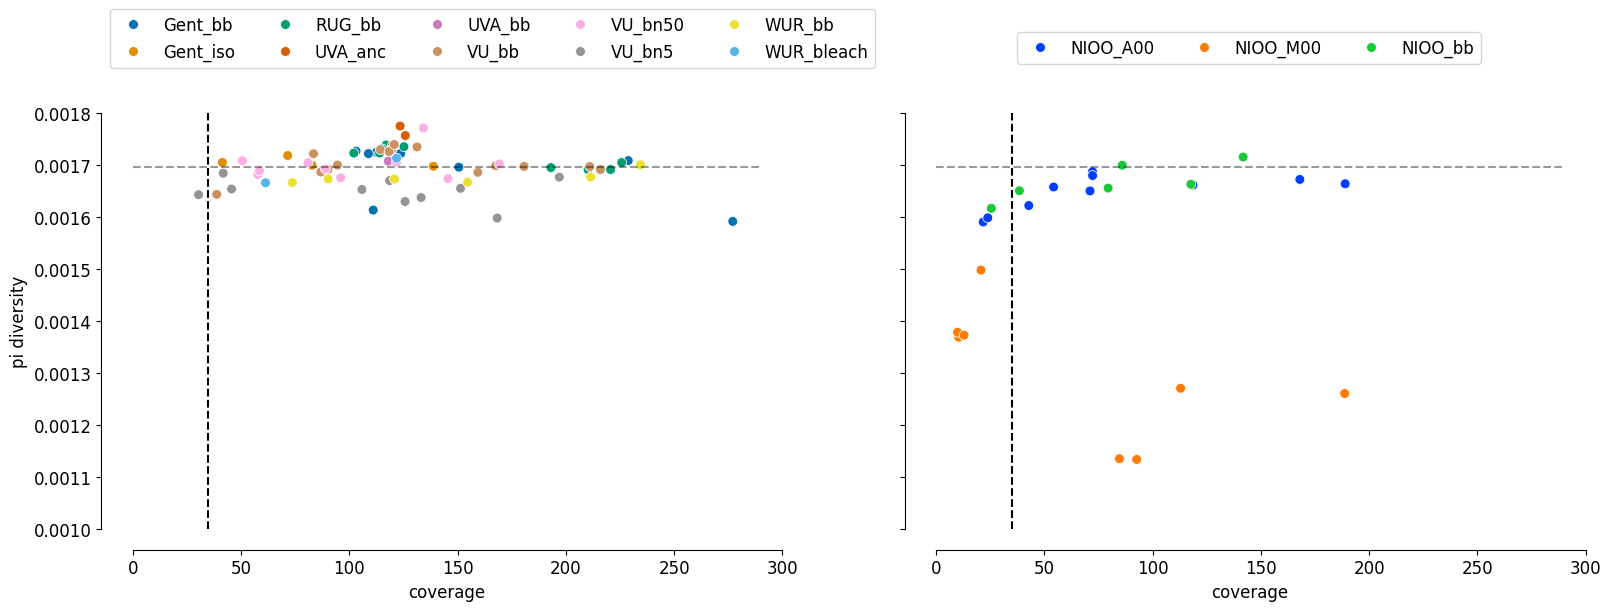

In [27]:
## 1. How does the normalized pi diversity look depending on coverage per institution

## what is the mean of all samples that are not NIOO and not below 35?
df_woNIOO = df_merge_all[df_merge_all["institution_x"]!="NIOO"]
df_woNIOO_cut =  df_woNIOO[df_woNIOO["coverage"]>35]
mean_woNIOO = np.nanmean(df_woNIOO_cut["divWeight_mean"].values)
std_woNIOO = np.nanstd(df_woNIOO_cut["divWeight_mean"].values)

plt.rcParams.update({'font.size': 12})

fig6, ax6 = plt.subplots(1,2,figsize=(16,6), sharey=True,constrained_layout = True)
sns.scatterplot(df_woNIOO, x="coverage",y="divWeight_mean", ax=ax6[0], 
                hue="inst_treat", s=50, palette="colorblind")
ax6[0].plot([35,35],[0.001,0.0018],"k--")
ax6[0].plot([0,290],[mean_woNIOO,mean_woNIOO],"k--", alpha=0.4)

sns.scatterplot(df_merge_all[df_merge_all["institution_x"]=="NIOO"], x="coverage",y="divWeight_mean", ax=ax6[1],
                hue="inst_treat", s=50, palette="bright")
ax6[1].plot([35,35],[0.001,0.0018],"k--")
ax6[1].plot([0,290],[mean_woNIOO,mean_woNIOO],"k--", alpha=0.4)
# Move the legend to an empty part of the plot
ax6[0].legend(bbox_to_anchor=(0, 1.2), loc='upper left', ncol=5)
ax6[1].legend(bbox_to_anchor=(0.15, 1.15), loc='upper left', ncol=3)

ax6[0].set_ylabel("pi diversity")
ax6[1].set_ylabel("pi diversity")
sns.despine(trim=True)

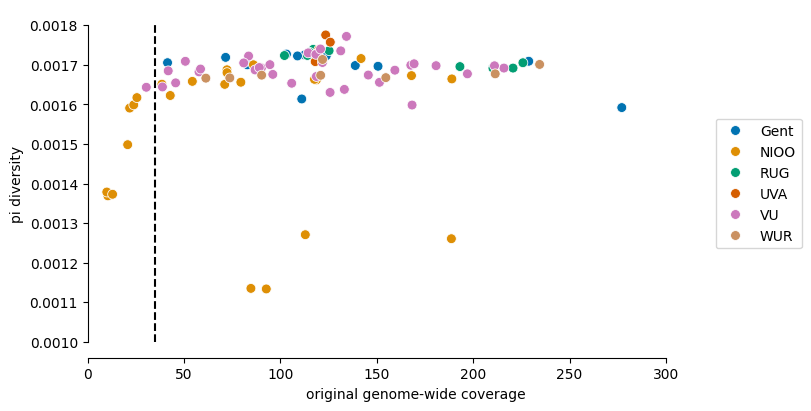

In [28]:
## 1. How does the normalized pi diversity look depending on coverage per institution

plt.rcParams.update({'font.size': 10})

fig10, ax10 = plt.subplots(figsize=(8,4), sharey=True,constrained_layout = True)
sns.scatterplot(df_merge_all, x="coverage",y="divWeight_mean", ax=ax10, 
                hue="institution_x", s=50, palette="colorblind")
ax10.plot([35,35],[0.001,0.0018],"k--")


sns.scatterplot(df_merge_all[df_merge_all["institution_x"]=="NIOO"], x="coverage",y="divWeight_mean", ax=ax6[1],
                hue="inst_treat", s=50, palette="bright")
ax10.legend(bbox_to_anchor=(1.1, 0.5), loc='right', ncol=1)
ax10.set_ylabel("pi diversity")
ax10.set_xlabel("original genome-wide coverage")
ax10.set_xlim([0,340])

sns.despine(trim=True)
#fig10.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_pi_cov_Colored_institution.png",dpi=300)

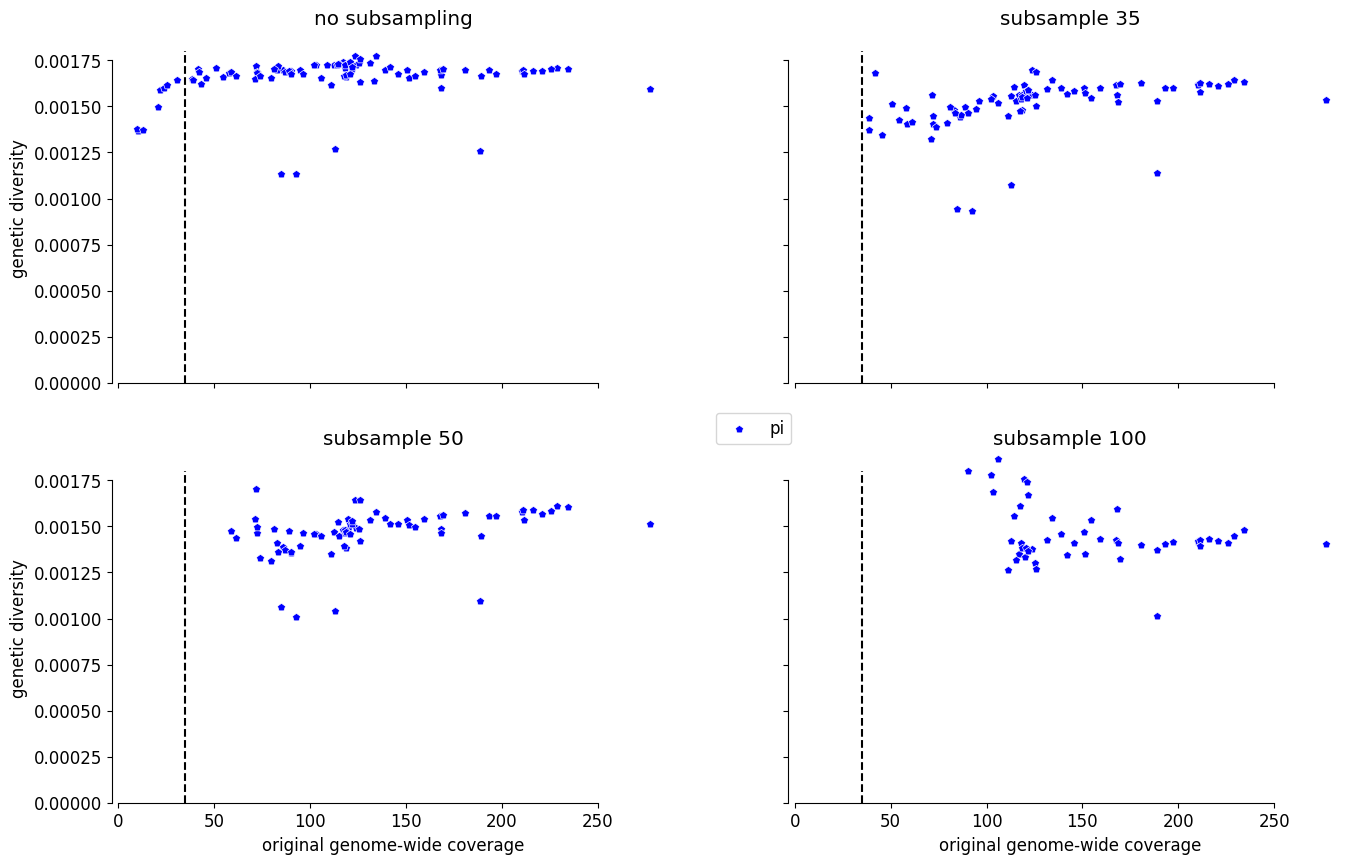

In [30]:
## hypothesis: different treatments start out with different diversity from the start:

fig1, ax1 = plt.subplots(2,2, figsize=(16,10), sharex=True, sharey=True)
#sns.scatterplot(df_merge_all, x="coverage",y="pi_mean", ax=ax1[0,0], color=".2")
p1 = sns.scatterplot(df_merge_all, x="coverage",y="divWeight_mean", ax=ax1[0,0], color="blue", marker="p",label="pi")
ax1[0,0].plot([35,35],[0,0.0018],"k--")
ax1[0,0].set_ylim([0,0.0019])
ax1[0,0].legend()
ax1[0,0].set_title("no subsampling")
ax1[0,0].legend(bbox_to_anchor=(1.22, -0.2), loc='lower right', ncol=1)
#sns.scatterplot(df_merge_change1, x="coverage",y="piNormwNaN_mean", ax=ax1, color=".2")
#sns.scatterplot(df_merge_change1, x="coverage",y="pi_mean", ax=ax1[0,1], color=".2")
sns.scatterplot(df_merge_change1, x="coverage",y="divWeight_mean", ax=ax1[0,1], color="blue", marker="p")
ax1[0,1].plot([35,35],[0,0.0018],"k--")
ax1[0,1].set_title("subsample 35")
ax1[0,0].set_ylabel("genetic diversity")
ax1[1,0].set_ylabel("genetic diversity")
ax1[1,0].set_xlabel("original genome-wide coverage")
ax1[1,1].set_xlabel("original genome-wide coverage")

#sns.scatterplot(df_merge_change2, x="coverage",y="pi_mean", ax=ax1[1,0], color=".2")
sns.scatterplot(df_merge_change2, x="coverage",y="divWeight_mean", ax=ax1[1,0], color="blue", marker="p")
ax1[1,0].plot([35,35],[0,0.0018],"k--")
ax1[1,0].set_title("subsample 50")

#sns.scatterplot(df_merge_change3, x="coverage",y="pi_mean", ax=ax1[1,1], color=".2")
sns.scatterplot(df_merge_change3, x="coverage",y="divWeight_mean", ax=ax1[1,1], color="blue", marker="p")
ax1[1,1].plot([35,35],[0,0.0018],"k--")
#ax1[1,1].set_ylim([0.0008,0.0018])
ax1[1,1].set_title("subsample 100")
sns.despine(trim=True)
#fig1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_subsample_Overview_pi_vs_cov.png",dpi=300)

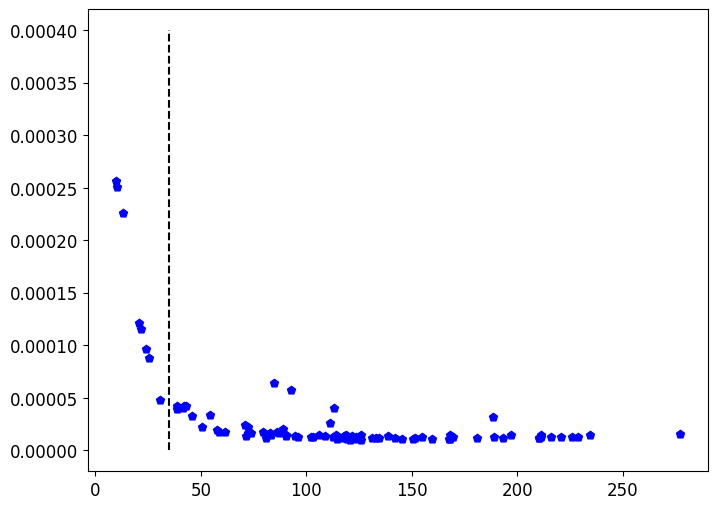

In [33]:
## now get how strong the values differ from each other:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.scatter(df_merge_all["coverage"].values, df_merge_all["div_mean"].values - df_merge_all["divWeight_mean"].values, color="blue", marker="p")
ax2.plot([35,35],[0,0.0004],"k--")
#sns.scatterplot(df_merge_all, x="coverage",y="piNormwNaN_mean", ax=ax1, color="magenta", marker="+")
#ax2.set_yscale('log')


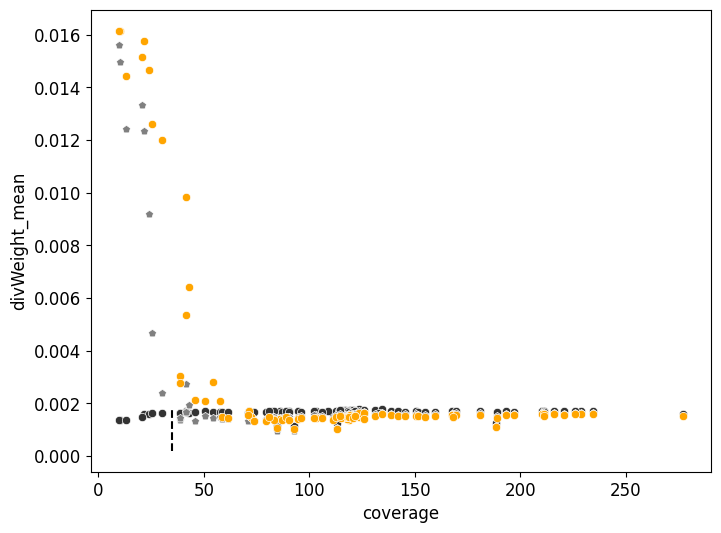

In [35]:
## hypothesis: different treatments start out with different diversity from the start:

fig3, ax3 = plt.subplots(figsize=(8,6))
sns.scatterplot(df_merge_all, x="coverage",y="divWeight_mean", ax=ax3, color=".2")
sns.scatterplot(df_merge_change1, x="coverage",y="divWeight_mean", ax=ax3, color="gray", marker="p")
sns.scatterplot(df_merge_change2, x="coverage",y="divWeight_mean", ax=ax3, color="orange", marker="o")
ax3.plot([35,35],[0.0002,0.0018],"k--")
#sns.scatterplot(df_merge_change3, x="coverage",y="piNorm_mean", ax=ax3, color="magenta", marker="+")


#sns.scatterplot(df_merge_change1, x="coverage",y="piNormwNaN_mean", ax=ax1, color=".2")
#sns.despine(offset=5, trim=True)


In [36]:
df_cov.sort_values(by=['coverage'])

,ID,institution,treatment,replicate,week,coverage
25,NIOO_M00_1_4,NIOO,M00,4,1,9.926993
24,NIOO_M00_1_3,NIOO,M00,3,1,10.491992
26,NIOO_M00_1_5,NIOO,M00,5,1,12.935134
23,NIOO_M00_1_1,NIOO,M00,1,1,20.763093
18,NIOO_A00_15_1,NIOO,A00,1,15,21.789504
16,NIOO_A00_1_4,NIOO,A00,4,1,23.910003
33,NIOO_bb_1_4,NIOO,bb,4,1,25.558647
72,VU_bn5_15_3,VU,bn5,3,15,30.427735
35,NIOO_bb_15_3,NIOO,bb,3,15,38.511431
61,VU_bb_15_2,VU,bb,2,15,38.796821
